<a href="https://colab.research.google.com/github/hk131999/NOPD_data_cleaning/blob/main/NOPD_record_cleanign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data=pd.read_csv('NOPD_Use_of_Force_Incidents.csv',na_values='0000')
df=pd.DataFrame(data)

In [ ]:
df.columns

Index(['PIB File Number', 'Date Occurred', 'Originating Bureau',
       'Division level', 'Division', 'Unit', 'Working Status', 'Shift',
       'Investigation status', 'Disposition', 'Service Type',
       'Light Condition', 'Weather Condition', 'Use of Force Type',
       'Use of Force Level', 'Subject Influencing Factors',
       'Use of Force Effective', 'Officer Race/Ethnicity', 'Officer Gender',
       'Officer Age', 'Officer Years of Service', 'Distance Between',
       'Subject Gender', 'Subject Ethnicity', 'Subject Age', 'Subject Build',
       'Subject Height', 'Subject Injured', 'Subject Hospitalized',
       'Subject Arrested', 'Subject Arrest Charges', 'Use of Force Reason',
       'Officer Injured'],
      dtype='object')

In [ ]:
df.fillna("Unknown",inplace=True)

In [ ]:
data=[]
for i in range(len(df)):

  UOFL=(df['Use of Force Level'][i]).split("|")
  UOFT=(df['Use of Force Type'][i]).split("|")
  UOFE=(df['Use of Force Effective'][i]).split("|")
  OE=(df['Officer Race/Ethnicity'][i]).split("|")
  OG=(df['Officer Gender'][i]).split("|")
  OA=(df['Officer Age'][i]).split("|")
  OYOS=(df['Officer Years of Service'][i]).split("|")
  OI=(df['Officer Injured'][i]).split("|")

  if(UOFL.count('|')>0):
    UOFL.remove('|')
    UOFT.remove('|')
    UOFE.remove('|')
    OE.remove('|')
    OG.remove('|')
    OA.remove('|')
    OYOS.remove('|')
    OI.remove('|')
  for j in range(len(UOFL)):
    item={}
    item['PIB File Number'] =(df['PIB File Number'][i])
    item['Date Occurred']=df['Date Occurred'][i]
    item['Originating Bureau']=df['Originating Bureau'][i]
    item['Division level']=df['Division level'][i]
    item['Unit']=df['Unit'][i]
    item['Workning Status']=df['Working Status'][i]
    item['Shift']=df['Shift'][i]
    item['Investigation status']=df['Investigation status'][i]
    item['Disposition']=df['Disposition'][i]
    item['Service Type']=df['Service Type'][i]
    item['Light Condition']=df['Light Condition'][i]
    item['Weather Condition']=(df['Weather Condition'][i])
    item['Use of Force Level']=UOFL[j]
    item['Use of Force Type']=UOFT[j]
    item['Use of Force Effective']=UOFE[j]
    item['Officer Race/Ethnicity']=OE[j]
    item['Officer Gender']=OG[j]
    item['Officer Age']=OA[j]
    item['Officer Years of Service']=OYOS[j]
    item['Officer Injured']=OI[j]
    data.append(item)
pd.DataFrame(data).to_csv('1.csv',index=False)

In [ ]:
data2=[]
for i in range(len(df)):
  SIF=(df['Subject Influencing Factors'][i]).split("|")
  SE=(df['Subject Ethnicity'][i]).split('|')
  SG=(df['Subject Gender'][i]).split("|")
  SA=(df['Subject Age'][i]).split("|")
  SB=(df['Subject Build'][i]).split('|')
  SH=(df['Subject Height'][i]).split('|')
  SI=(df['Subject Injured'][i]).split('|')
  SHD=(df['Subject Hospitalized'][i]).split('|')
  SAD=(df['Subject Arrested'][i]).split("|")

  if(SIF.count('|')>0):
    SIF.remove("|")
    SE.remove('|')
    SG.remove("|")
    SA.remove("|")
    SB.remove("|")
    SH.remove("|")
    SI.remove("|")
    SHD.remove("|")
    SAD.remove("|")
  for j in range(len(SIF)):
    item={}
   
    item['PIB File Number'] =(df['PIB File Number'][i])
    item['Date Occurred']=df['Date Occurred'][i]
    item['Originating Bureau']=df['Originating Bureau'][i]
    item['Division level']=df['Division level'][i]
    item['Unit']=df['Unit'][i]
    item['Workning Status']=df['Working Status'][i]
    item['Shift']=df['Shift'][i]
    item['Investigation status']=df['Investigation status'][i]
    item['Disposition']=df['Disposition'][i]
    item['Service Type']=df['Service Type'][i]
    item['Light Condition']=df['Light Condition'][i]
    item['Weather Condition']=(df['Weather Condition'][i])
    item['Subject Influencing Factors']=SIF[j]
    item['Subject Ethnicity']=SE[j]
    item['Subject Gender']=SG[j]
    try:
      item['Subject Age']=SA[j]
      item['Subject Build']=SB[j]
      item['Subject Height']=SH[j]
      item['Subject Injured']=SI[j]
      item['Subject Hospitalized']=SHD[j]
      item['Subject Arrested']=SAD[j]
    except IndexError:
       item['Subject Age']='Unknown'
       item['Subject Height']='Unknown'
       item['Subject Build']='Unknown'
       item['Subject Injured']='Unknown'
       item['Subject Hospitalized']='Unknown'
       item['Subject Arrested']='Unknown'
    
   
    data2.append(item)
pd.DataFrame(data2).to_csv('2.csv',index=False)

In [ ]:
subject_data=pd.read_csv('2.csv')
subject_data.head(2)

<AxesSubplot:xlabel='Subject Ethnicity', ylabel='count'>

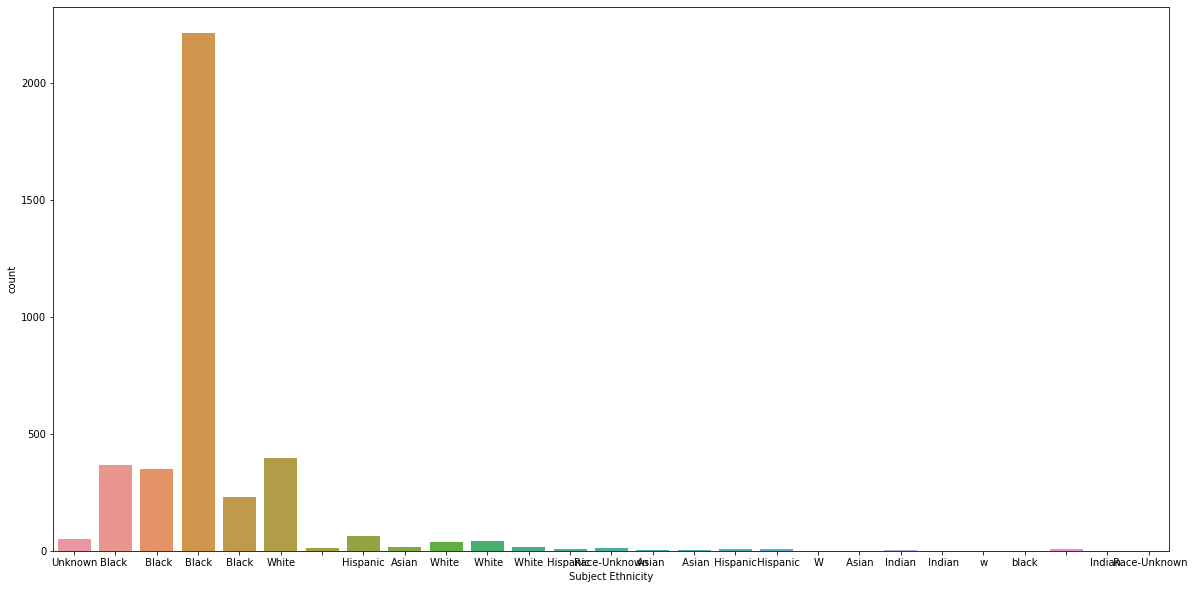

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20, 10))
sns.countplot(data=subject_data,x=subject_data['Subject Ethnicity'],ax=ax)